In [3]:
import vincent
import plotly
import pandas as pd
import matplotlib.pyplot as plt
import plotly.plotly as py
from tabulate import tabulate
from mpl_toolkits.mplot3d import Axes3D
import folium

plotly.tools.set_credentials_file(username='hwhh', api_key='N2vCMdq9jiSqdFGIzNsD')

colours = ['#009094', '#97bf0d', '#0028ff', '#68071d', '#7aa74d', '#164af9', '#615a51', '#0b4a72', '#b8101f', '#e6dbaf',
           '#e1fffe', '#0e320c', '#e3f1fd', '#f0c141', '#e44849', '#947057', '#251c38', '#5d478d', '#feb4b1', '#0000c8',
           '#f17a9c', '#ffc6d5', '#ff99cc', '#67d5ff', '#f0f8ff', '#794740', '#fab631', '#a5a44a', '#28352c', '#0e2024',
           '#37526f', '#ad1a2c', '#ba7259', '#6d9da1', '#e15c39', '#929f36', '#deb390', '#d14643', '#74737a', '#65646c',
           '#54535c', '#42404a']

regions = {'E12000001': 'North East', 'E12000002': 'North West', 'E12000003': 'Yorkshire and the Humber',
           'E12000004': 'East Midlands', 'E12000005': 'West Midlands', 'E12000006': 'East of England',
           'E12000007': 'London', 'E12000008': 'South East', 'E12000009': 'South West', 'W92000004': 'Wales'}

coordinates = {'E12000001': [54.9, -1.6], 'E12000002': [54.04, -2.79], 'E12000003': [53.95, -1.007],
               'E12000004': [52.95, -0.604], 'E12000005': [52.39, -2.04], 'E12000006': [52.316, 0.658],
               'E12000007': [51.5, -0.12], 'E12000008': [50.96, -0.65], 'E12000009': [50.9, -3.34],
               'W92000004': [52.46, -3.77]}

occupations = {1: "Managers, Directors and Senior Officials", 2: "Professional",
               3: "Associate Professional and Technical", 4: "Administrative and Secretarial",
               5: "Skilled Trades", 6: "Caring, Leisure and Other Service", 7: "Sales and Customer Service",
               8: "Process, Plant and Machine Operatives", 9: "Elementary", -9: "Under 16 never worked"}

ages = {1: "0 to 15", 2: "16 to 24", 3: "25 to 34", 4: "35 to 44",
        5: "45 to 54", 6: "55 to 64", 7: "65 to 74", 8: "75 and over"}

economic_acts = {1: "Employe", 2: "Self-employed", 3: "Unemployed", 4: "Full-time student",
                 5: "Retired", 6: "Student", 7: "Looking after home or family",
                 8: "Long-term sick or disabled", 9: "Other", -9: "Aged under 16 or students"}

In [4]:
def analyse(df):
    print('Total no of records: ', df.shape[0])
    print(df.groupby('Region').size(), '\n')
    print(df.groupby('Residence Type').size(), '\n')
    print(df.groupby('Family Composition').size(), '\n')
    print(df.groupby('Population Base').size(), '\n')
    print(df.groupby('Sex').size(), '\n')
    print(df.groupby('Age').size(), '\n')
    print(df.groupby('Marital Status').size(), '\n')
    print(df.groupby('Student').size(), '\n')
    print(df.groupby('Country of Birth').size(), '\n')
    print(df.groupby('Health').size(), '\n')
    print(df.groupby('Ethnic Group').size(), '\n')
    print(df.groupby('Religion').size(), '\n')
    print(df.groupby('Economic Activity').size(), '\n')
    print(df.groupby('Occupation').size(), '\n')
    print(df.groupby('Industry').size(), '\n')
    print(df.groupby('Hours worked per week').size(), '\n')
    print(df.groupby('Approximated Social Grade').size(), '\n')

In [5]:
def read_csv(file_name):
    df = pd.read_csv(file_name, error_bad_lines=False)
    df = df[df['Region'].isin(
        ['E12000001', 'E12000002', 'E12000003', 'E12000004', 'E12000005',
         'E12000006', 'E12000007', 'E12000008', 'E12000009', 'W92000004'])]
    df = df[df['Residence Type'].isin(['C', 'H'])]
    df = df[df['Family Composition'].isin([1, 2, 3, 4, 5, 6, -9])]  # can change to: list(range(0, x).append(-9)
    df = df[df['Population Base'].isin([1, 2, 3])]
    df = df[df['Sex'].isin([1, 2])]
    df = df[df['Age'].isin([1, 2, 3, 4, 5, 6, 7, 8])]
    df = df[df['Marital Status'].isin([1, 2, 3, 4, 5])]
    df = df[df['Student'].isin([1, 2])]
    df = df[df['Country of Birth'].isin([1, 2, -9])]
    df = df[df['Health'].isin([1, 2, 3, 4, 5, -9])]
    df = df[df['Ethnic Group'].isin([1, 2, 3, 4, 5, -9])]
    df = df[df['Religion'].isin([1, 2, 3, 4, 5, 6, 7, 8, 9, -9])]
    df = df[df['Economic Activity'].isin([1, 2, 3, 4, 5, 6, 7, 8, 9, -9])]
    df = df[df['Occupation'].isin([1, 2, 3, 4, 5, 6, 7, 8, 9, -9])]
    df = df[df['Industry'].isin([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, -9])]
    df = df[df['Hours worked per week'].isin([1, 2, 3, 4, -9])]
    df = df[df['Approximated Social Grade'].isin([1, 2, 3, 4, -9])]
    df.duplicated(['Person ID'], keep='first')
    return df

In [6]:
def create_bar_plot(char_type, df, column, names, title, x_axis, y_axis):
    df_size = len(df[column].unique())
    color_map = [[x / df_size, x / (df_size * 5.0), 0.2] for x in range(df_size)]
    df = df.replace({column: names})
    plot = df[column].value_counts().plot(kind=char_type, title=title, color=color_map)
    plot.set_xlabel(x_axis)
    plot.set_ylabel(y_axis)
    plt.show()


def create_pie_plot(char_type, df, column, names, title):
    df = df.replace({column: names})
    df[column].value_counts().plot(kind=char_type, title=title)
    plt.show()

In [7]:
data = read_csv('data')

In [8]:
analyse(data)

Total no of records:  569741
Region
E12000001    26349
E12000002    71436
E12000003    53471
E12000004    45782
E12000005    56875
E12000006    59411
E12000007    83582
E12000008    88084
E12000009    53774
W92000004    30977
dtype: int64 

Residence Type
C     10654
H    559087
dtype: int64 

Family Composition
-9     18851
 1     96690
 2    300962
 3     72641
 4      9848
 5     64519
 6      6230
dtype: int64 

Population Base
1    561040
2      6730
3      1971
dtype: int64 

Sex
1    280569
2    289172
dtype: int64 

Age
1    106832
2     72785
3     75948
4     78641
5     77388
6     65666
7     48777
8     43704
dtype: int64 

Marital Status
1    270999
2    214180
3     11951
4     40713
5     31898
dtype: int64 

Student
1    126537
2    443204
dtype: int64 

Country of Birth
-9      6804
 1    485645
 2     77292
dtype: int64 

Health
-9      6804
 1    264971
 2    191744
 3     74480
 4     24558
 5      7184
dtype: int64 

Ethnic Group
-9      6804
 1    483477
 2     1

In [ ]:
print(tabulate(data, headers=["Index", 'Region', 'Residence Type','Family Composition','Population Base','Sex','Age','Marital Status','Student','Country of Birth','Health','Ethnic Group','Religion','Economic Activity','Occupation','Industry','Hours worked per week','Approximated Social Grade'],tablefmt="fancy_grid"))

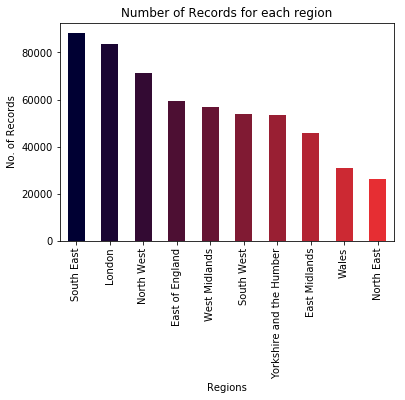

In [31]:
create_bar_plot('bar', data, 'Region', regions, 'Number of Records for each region', 'Regions', 'No. of Records')

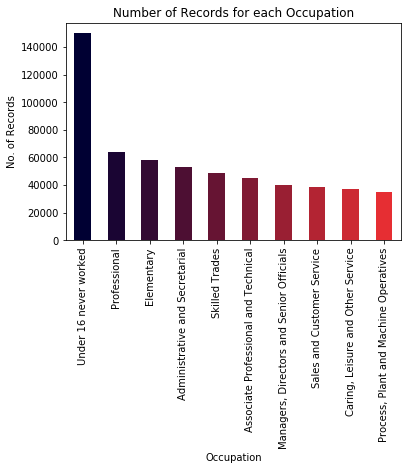

In [32]:
create_bar_plot('bar', data, 'Occupation', occupations, 'Number of Records for each Occupation', 'Occupation', 'No. of Records')

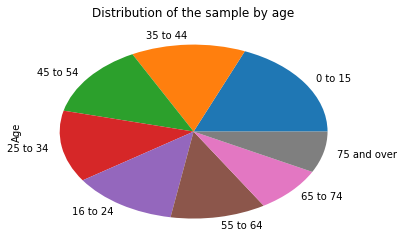

In [33]:
create_pie_plot('pie', data, 'Age', ages, 'Distribution of the sample by age')

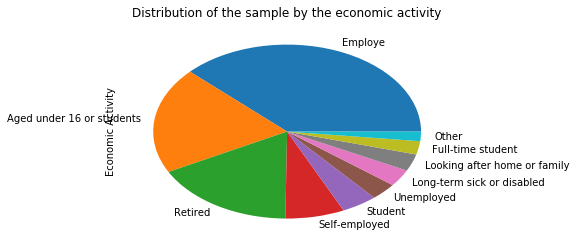

In [34]:
create_pie_plot('pie', data, 'Economic Activity', economic_acts, 'Distribution of the sample by the economic activity')

In [35]:
def group(df, col1, col2):
    return df.groupby([col1, col2]).size()

In [36]:
print(tabulate(group(data, 'Region', 'Industry').reset_index(name='count'), headers=["Index", 'Region', 'Industry', "Count"], tablefmt="fancy_grid"))

╒═════════╤═══════════╤════════════╤═════════╕
│   Index │ Region    │   Industry │   Count │
╞═════════╪═══════════╪════════════╪═════════╡
│       0 │ E12000001 │         -9 │    6854 │
├─────────┼───────────┼────────────┼─────────┤
│       1 │ E12000001 │          1 │     132 │
├─────────┼───────────┼────────────┼─────────┤
│       2 │ E12000001 │          2 │    2851 │
├─────────┼───────────┼────────────┼─────────┤
│       3 │ E12000001 │          3 │    1574 │
├─────────┼───────────┼────────────┼─────────┤
│       4 │ E12000001 │          4 │    3087 │
├─────────┼───────────┼────────────┼─────────┤
│       5 │ E12000001 │          5 │    1300 │
├─────────┼───────────┼────────────┼─────────┤
│       6 │ E12000001 │          6 │    1438 │
├─────────┼───────────┼────────────┼─────────┤
│       7 │ E12000001 │          7 │     524 │
├─────────┼───────────┼────────────┼─────────┤
│       8 │ E12000001 │          8 │    1883 │
├─────────┼───────────┼────────────┼─────────┤
│       9 │ E

In [1]:
def create_3d_bar(df):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    plt.xticks(df.index.levels[1])
    plt.yticks(range(len(df.index.levels[0])), df.index.levels[0])
    for x in range(len(df.index.levels[0])):
        xs = df[df.index.levels[0][x]]
        ax.bar(xs.index, xs.values, zs=x, zdir='y')
    plt.show()

In [2]:
create_3d_bar(group(data, 'Region', 'Industry', False).reset_index(name='count'), 'Region', 'Industry')

NameError: name 'group' is not defined

In [2]:
create_3d_plot(group(data, 'Occupation', 'Approximated Social Grade'))

NameError: name 'create_3d_plot' is not defined

In [3]:
def create_plotly_plot(df, col1, col2, title):
    gf = df.groupby(col1)
    column1 = df[col1].unique()
    out = []
    for column, fill_color in zip(column1, colours):  # [start:stop:step]
        group_1 = gf.get_group(column)
        column2 = group_1[col2].tolist()
        length = len(column2)
        z_axis = [column] * length
        count = group_1['count'].tolist()
        zeros = [0] * length
        out.append(dict(
            type='scatter3d',
            mode='lines',
            x=column2 + column2[::-1] + [column2[0]],
            y=z_axis * 2 + [z_axis[0]],
            z=count + zeros + [count[0]],
            name='',
            surfacecolor=fill_color,
            surfaceaxis=1,
            line=dict(
                color='black',
                width=4
            ),
        ))

    layout = dict(title=title, showlegend=False,scene=dict(xaxis=dict(title=''),yaxis=dict(title=''),zaxis=dict(title=''),camera=dict(eye=dict(x=-1.7, y=-1.7, z=0.5))))
    fig = dict(data=out, layout=layout)
    return py.iplot(fig, validate=False, filename='3d-lines')

In [41]:
create_plotly_plot(group(data, 'Region', 'Industry').reset_index(name='count'), 'Region', 'Industry', 'Region vs Industry')

In [4]:
create_plotly_plot(group(data, 'Occupation', 'Approximated Social Grade').reset_index(name='count'), 'Occupation', 'Approximated Social Grade', 'Occupation vs Approximated Social Grade')

NameError: name 'group' is not defined

In [5]:
def create_map(df, col1):
    regions_geo = 'regions.geojson'
    df1 = df.groupby('Region').size()
    map_1 = folium.Map(location=[52.958, 0.7], zoom_start=7)
    map_1.choropleth(geo_path=regions_geo, data=df1,
                     columns=['region_code', 'Size'],
                     key_on='properties.region_code',
                     fill_color='BuPu', fill_opacity=0.7, line_opacity=0.2,
                     legend_name='No. of people from region in census')
    
    for region in df['Region'].unique().tolist():
        df1 = df[df['Region'].str.contains(region)]
        bar = vincent.Bar(df1[col1].value_counts(), width=350, height=250)
        xtitle = col1 + "in: "+ regions.get(region)
        bar.axis_titles(x=xtitle, y='')
        loc = coordinates.get(region)
        popup1 = folium.Popup(max_width=800, ).add_child(folium.Vega(bar, width=400, height=300))
        folium.RegularPolygonMarker(loc, fill_color='#43d9de', radius=12, popup=popup1).add_to(map_1)
    
    return map_1

In [44]:
create_map(data, 'Industry')